In [257]:

import os
import pandas as pd
import numpy as np
import glob
import plotnine as gg
import re
from plotnine import *
import matplotlib.pyplot as plt

In [258]:

os.getcwd()

'/Users/habbasi/Documents/Broad/Broad_collaborative_projects /Assay_Dev_projects/Tissue_projects/2016_10_19_InSitu_Expression_Hacohen_Lab_Paul_Hoover_Partners/Scripts'

## Loading data

In [259]:
path = '../Data/ExpPHa07_1' 
csv_files = glob.glob(path + "/*.csv")

csvlist = []

for fname in csv_files:
    df = pd.read_csv(fname, index_col=None, header=0)
    csvlist.append(df)

data = pd.concat(csvlist, axis=0, ignore_index=True)
data.head()


,Image Location,Analysis Region,Analysis Inputs,Object Id,XMin,XMax,YMin,YMax,Opal 520 Copies,Opal 520 Area (µm²),...,Opal 690 Copies,Opal 690 Area (µm²),Opal 690 Classification,Opal 690 Cell Intensity,Opal 690 Avg Intensity,Cell Area (µm²),Cytoplasm Area (µm²),Nucleus Area (µm²),Nucleus Perimeter (µm),Nucleus Roundness
0,\\172.20.47.181\data\CTC_Lab\Polaris\2020-02(F...,outline,Class List:;Classifier:;Classifier Output Type...,0,1819,1837,1136,1155,5,2.459689,...,0,0.0,0,0.0,0.0,54.60511,34.68162,19.92348,19.34215,0.716581
1,\\172.20.47.181\data\CTC_Lab\Polaris\2020-02(F...,outline,Class List:;Classifier:;Classifier Output Type...,1,1809,1825,1137,1157,0,0.000000,...,0,0.0,0,0.0,0.0,59.27851,41.32278,17.95573,17.35834,0.717423
2,\\172.20.47.181\data\CTC_Lab\Polaris\2020-02(F...,outline,Class List:;Classifier:;Classifier Output Type...,2,1977,1995,1139,1152,0,0.000000,...,0,0.0,0,0.0,0.0,47.22604,34.68162,12.54442,13.39072,0.839642
3,\\172.20.47.181\data\CTC_Lab\Polaris\2020-02(F...,outline,Class List:;Classifier:;Classifier Output Type...,3,1894,1911,1140,1157,0,0.000000,...,0,0.0,0,0.0,0.0,42.55263,30.74612,11.80651,14.87858,0.684001
4,\\172.20.47.181\data\CTC_Lab\Polaris\2020-02(F...,outline,Class List:;Classifier:;Classifier Output Type...,4,1753,1770,1143,1167,11,4.427441,...,0,0.0,0,0.0,0.0,75.75844,57.31076,18.44767,18.84620,0.650195


## Renaming of Column names

In [260]:

data.columns = [col.replace(' ', '_') for col in data.columns]



## Extracting Tissue image name

In [261]:
data['Image_Location'] = pd.DataFrame(data.loc[:, 'Image_Location']
                                      .str.split('\\')
                                      .str.get(9)
                                      .str.replace('.tif', ''))

data['Image_Location'].unique()

array(['ExpPHa07_1_b', 'ExpPHa07_1_c', 'ExpPHa07_1_d', 'ExpPHa07_1_a'],
      dtype=object)

## Function to Calculate Centroids of the rectangular bounding boxes

### Note:
### 1st step: calculating center of detected objects by calculating center of bounding boxes

In [262]:
# Use the height and width to calculate the area
def X_centroid(row):
    X = int(row['XMin'] + row['XMax'])/2

    return int(X)

def Y_centroid(row):
    Y = int(row['YMin'] + row['YMax'])/2
    return int(Y)

data['X'] = data.apply(X_centroid, axis=1)
data['Y'] = data.apply(Y_centroid, axis=1)


In [263]:
data.head()

,Image_Location,Analysis_Region,Analysis_Inputs,Object_Id,XMin,XMax,YMin,YMax,Opal_520_Copies,Opal_520_Area_(µm²),...,Opal_690_Classification,Opal_690_Cell_Intensity,Opal_690_Avg_Intensity,Cell_Area_(µm²),Cytoplasm_Area_(µm²),Nucleus_Area_(µm²),Nucleus_Perimeter_(µm),Nucleus_Roundness,X,Y
0,ExpPHa07_1_b,outline,Class List:;Classifier:;Classifier Output Type...,0,1819,1837,1136,1155,5,2.459689,...,0,0.0,0.0,54.60511,34.68162,19.92348,19.34215,0.716581,1828,1145
1,ExpPHa07_1_b,outline,Class List:;Classifier:;Classifier Output Type...,1,1809,1825,1137,1157,0,0.000000,...,0,0.0,0.0,59.27851,41.32278,17.95573,17.35834,0.717423,1817,1147
2,ExpPHa07_1_b,outline,Class List:;Classifier:;Classifier Output Type...,2,1977,1995,1139,1152,0,0.000000,...,0,0.0,0.0,47.22604,34.68162,12.54442,13.39072,0.839642,1986,1145
3,ExpPHa07_1_b,outline,Class List:;Classifier:;Classifier Output Type...,3,1894,1911,1140,1157,0,0.000000,...,0,0.0,0.0,42.55263,30.74612,11.80651,14.87858,0.684001,1902,1148
4,ExpPHa07_1_b,outline,Class List:;Classifier:;Classifier Output Type...,4,1753,1770,1143,1167,11,4.427441,...,0,0.0,0.0,75.75844,57.31076,18.44767,18.84620,0.650195,1761,1155


### Plotting of coordinates

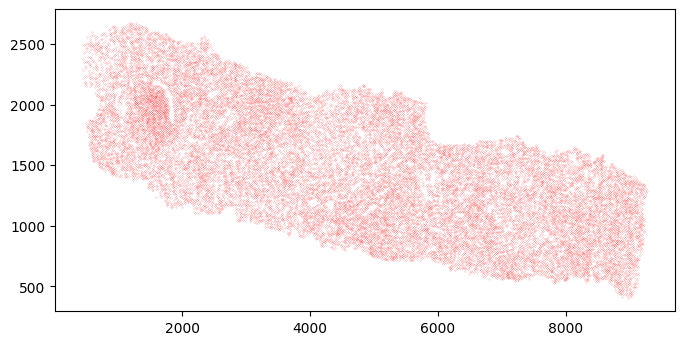

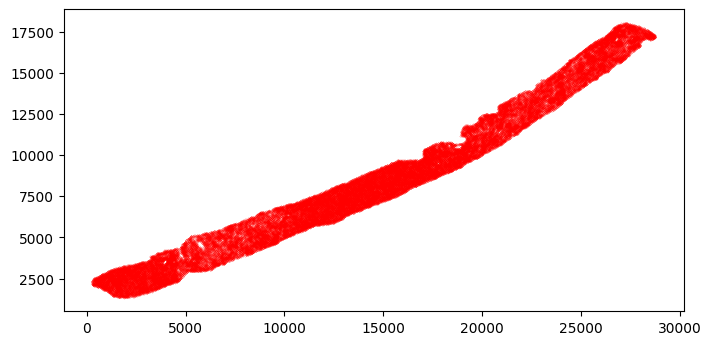

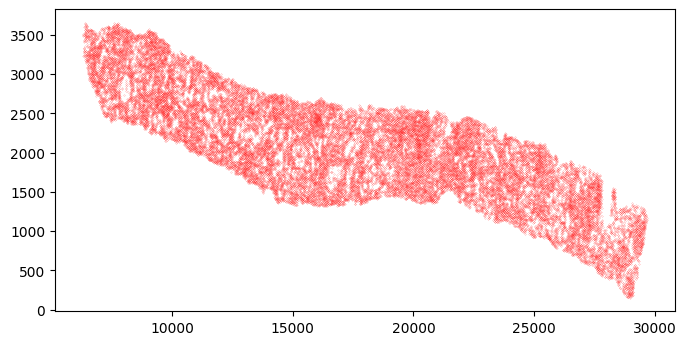

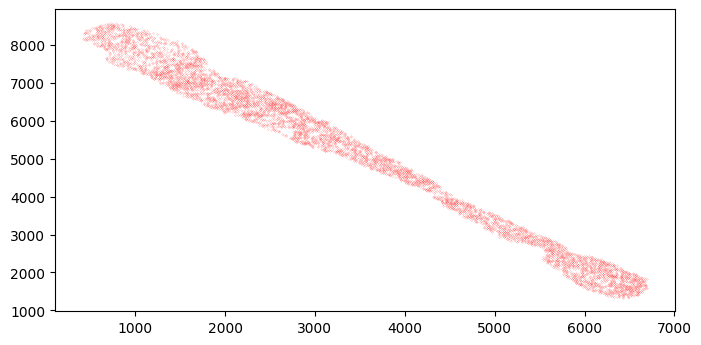

In [267]:
for i, p in enumerate(data.Image_Location.unique().tolist()):
    df = data.loc[data['Image_Location'] == str(p)]
    x = np.array(df.XMax)
    y = np.array(df.YMax)
    
    w = 8
    h = 4
    d=100
    plt.figure(figsize=(w, h), dpi=d)
    plt.plot(x, y, 'ro', markersize=0.1)
    #plt.savefig("../Figures/tissue1.png")
    
    

    





### Classification Function

In [268]:
def classification(row):
    
    if (row['Opal_520_Classification'] >= 3) & (row['Opal_570_Classification'] < 2) & (row['Opal_620_Classification'] < 2) & (row['Opal_690_Classification'] < 2):
        return 'MYELOID_CM0_SUBTYPE'
    elif (row['Opal_520_Classification'] < 2) & (row['Opal_570_Classification'] >= 3) & (row['Opal_620_Classification'] < 2) & (row['Opal_690_Classification'] < 2):
        return 'MYELOID_CM4_SUBTYPE'
    elif (row['Opal_520_Classification'] == 0) & (row['Opal_570_Classification'] == 0) & (row['Opal_620_Classification'] >= 3) & (row['Opal_690_Classification'] == 0):
        return 'MYELOID_all'
    elif (row['Opal_520_Classification'] < 2) & (row['Opal_570_Classification'] < 2) & (row['Opal_620_Classification'] < 2) & (row['Opal_690_Classification'] >= 3):
        return 'MYELOID_CM1_SUBTYPE'
    else:
        return 'UNCLASSIFIED'
    
    

## Applying Classification Function

In [269]:

data['Classification'] = data.apply(classification, axis=1)

data['Classification'].unique()




array(['UNCLASSIFIED', 'MYELOID_CM0_SUBTYPE', 'MYELOID_CM4_SUBTYPE',
       'MYELOID_CM1_SUBTYPE', 'MYELOID_all'], dtype=object)

In [220]:
# labels = data.Classification.unique().tolist()
# Values = data.groupby('Classification').size()



# labels = 'UNCLASSIFIED', 'CM0', 'CM1', 'CM4', 'all'
# sizes = [131731, 3726, 1674, 1674, 181]
# explode = (0.1, 0, 0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

# fig1, ax1 = plt.subplots()
# p = ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=90, pctdistance=1.5, labeldistance=1.5)
# plt.legend(p[0], labels, loc="upper corner", bbox_to_anchor = (1,1))
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# # plt.show()


### Plotting

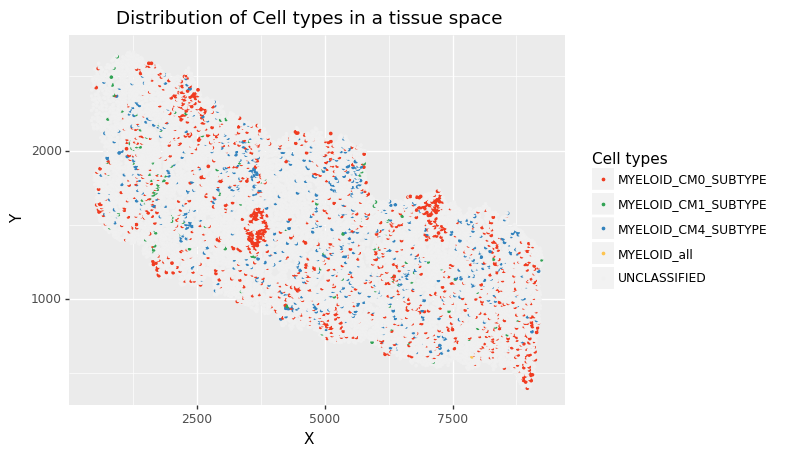

<ggplot: (287526771)>


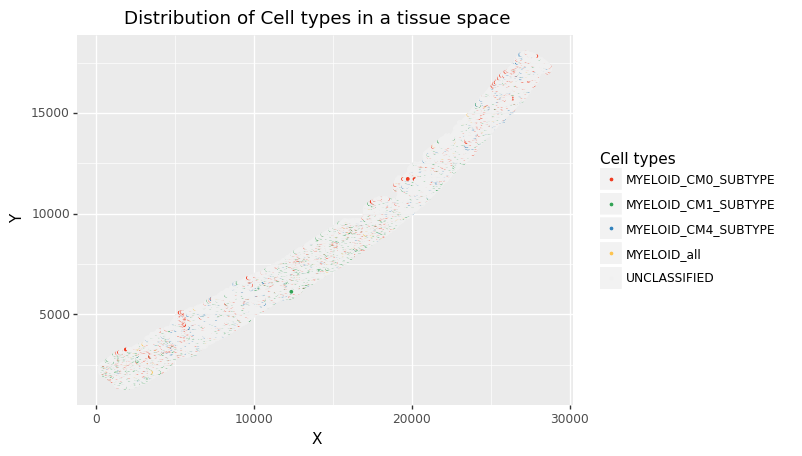

<ggplot: (287511233)>


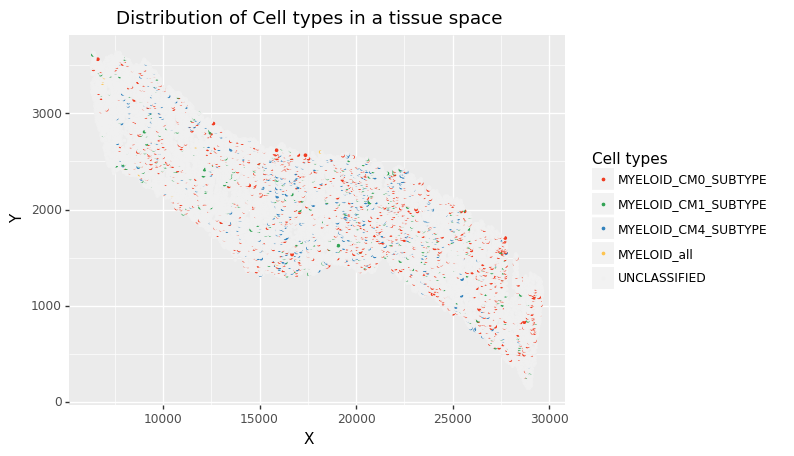

<ggplot: (365634804)>


ValueError: arrays must all be same length

In [272]:
tissuelist = data.Image_Location.unique().tolist()
tissuelist

for i, p in enumerate(tissuelist):
    dt = data.loc[data['Image_Location'] == str(p)]
    
    g = gg.ggplot(dt, gg.aes(x='X', y='Y', color= 'Classification')) + \
    gg.geom_point(size = 0.5) + \
    gg.xlab("X") + \
    gg.ylab("Y") + \
    gg.ggtitle("Distribution of Cell types in a tissue space") + \
    gg.scale_colour_manual(name= "Cell types", 
                           labels=['MYELOID_CM0_SUBTYPE', 'MYELOID_CM1_SUBTYPE', 'MYELOID_CM4_SUBTYPE', 'MYELOID_all', 'UNCLASSIFIED'], 
                           values = ["#f03b20", "#31a354", "#3182bd", '#fec44f', "#f0f0f0"])
    print(g)
   


    

# ggsave(filename='cell_classification.png', plot = p, 
#        path = '../Figures/')




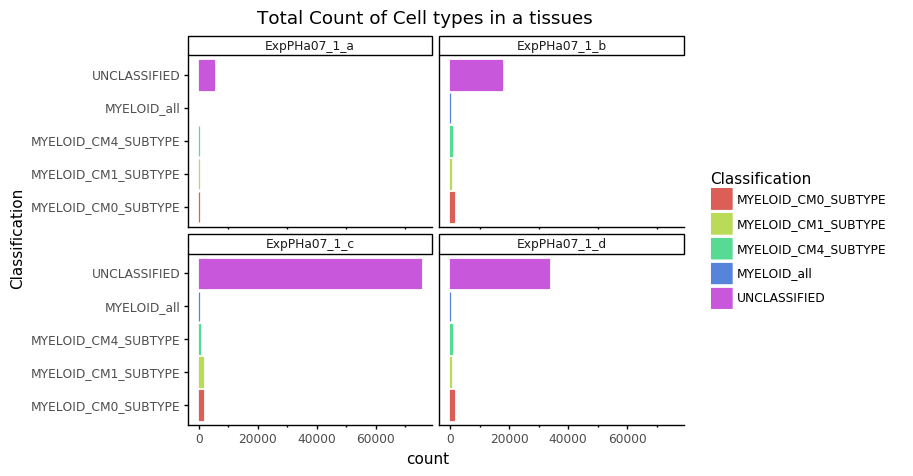

<ggplot: (358676866)>


In [274]:
p = (
    ggplot(data)
    + geom_bar(aes(x='Classification', fill = 'Classification',  color= 'Classification'))
    + coord_flip()
    + theme_classic() +
    gg.ggtitle("Total Count of Cell types in a tissues "))
# ggsave(filename='Total_Count_Celltypes.png', plot = p, 
#        path = '/Users/habbasi/Desktop/012120_Halo_outputs/Figures')
print(p + facet_wrap('~ Image_Location', nrow=2))

In [195]:
import plotly
import plotly.graph_objs as go
from plotly import tools
import psutil

d = data.loc[data['Image_Location'] == 'ExpPHa07_1_a']
d.groupby('Classification').size()

colors = ['#fc9272','#ffff99', '#7fcdbb', '#beaed4', '#7fc97f']
labels = d['Classification'].unique()
values = d['Classification'].value_counts(dropna=False)

fig = go.Pie(labels=labels, values=values, marker=dict(colors=colors, line=dict(color='#FFF', width=2)),
               domain={'x': [0.0, 1], 'y': [0.0, 1]}, showlegend=False, name='Count of Cell types', textinfo='label+percent')
    

layout = go.Layout(height = 600,
                   width = 1000,
                   autosize = False,
                   title = 'ExpPHa07_1_a')




fig = go.Figure(data = fig, layout = layout)
fig


In [196]:
d = data.loc[data['Image_Location'] == 'ExpPHa07_1_b']
d.groupby('Classification').size()

colors = ['#fc9272','#ffff99', '#7fcdbb', '#beaed4', '#7fc97f']
labels = d['Classification'].unique()
values = d['Classification'].value_counts(dropna=False)

fig = go.Pie(labels=labels, values=values, marker=dict(colors=colors, line=dict(color='#FFF', width=2)),
               domain={'x': [0.0, 1], 'y': [0.0, 1]}, showlegend=False, name='Count of Cell types', textinfo='label+percent')
    

layout = go.Layout(height = 600,
                   width = 1000,
                   autosize = False,
                   title = 'ExpPHa07_1_b')




fig = go.Figure(data = fig, layout = layout)
fig

In [197]:
d = data.loc[data['Image_Location'] == 'ExpPHa07_1_c']
d.groupby('Classification').size()

colors = ['#fc9272','#ffff99', '#7fcdbb', '#beaed4', '#7fc97f']
labels = d['Classification'].unique()
values = d['Classification'].value_counts(dropna=False)

fig = go.Pie(labels=labels, values=values, marker=dict(colors=colors, line=dict(color='#FFF', width=2)),
               domain={'x': [0.0, 1], 'y': [0.0, 1]}, showlegend=False, name='Count of Cell types', textinfo='label+percent')
    

layout = go.Layout(height = 600,
                   width = 1000,
                   autosize = False,
                   title = 'ExpPHa07_1_c')




fig = go.Figure(data = fig, layout = layout)
fig

In [199]:
d = data.loc[data['Image_Location'] == 'ExpPHa07_1_d']
d.groupby('Classification').size()

colors = ['#fc9272','#ffff99', '#7fcdbb', '#beaed4', '#7fc97f']
labels = d['Classification'].unique()
values = d['Classification'].value_counts(dropna=False)

fig = go.Pie(labels=labels, values=values, marker=dict(colors=colors, line=dict(color='#FFF', width=2)),
               domain={'x': [0.0, 1], 'y': [0.0, 1]}, showlegend=False, name='Count of Cell types', textinfo='label+percent')
    

layout = go.Layout(height = 600,
                   width = 1000,
                   autosize = False,
                   title = 'ExpPHa07_1_d')




fig = go.Figure(data = fig, layout = layout)
fig

In [198]:
# %reload_ext rpy2.ipython
# %R -i data

# from rpy2.robjects.packages import importr
# import rpy2.robjects as ro

# stats = importr('stats')
# base = importr('base')
# tidy = importr('tidyverse')
# akima = importr('akima')


# data.to_csv('../Data/data.csv')

## Calculating Distances among cells

In [13]:
import math

combinations = []
for i in data['Classification']:
    for j in data['Classification']:
        comb = [i, j]
        combinations.append(comb)


X = list(data.X)       
Y = list(data.Y)

distance = []  
for i in range(0, len(X)):
    for j in range(0, len(X)):
        dist = math.sqrt((X[j] - X[i])**2 + ((Y[j] - Y[i])**2)) * 0.495952562137432
        distance.append(dist)

       
coordinates = []        
for i in zip(data.X, data.Y):
    for j in zip(data.X, data.Y):
        cor = [i, j]
        coordinates.append(cor)
        
obj = []        
for i in range(0, len(data.Object_Id)):
    for j in range(0, len(data.Object_Id)):
        com_obj = [i, j]
        obj.append(com_obj)
        

obj_id = pd.DataFrame(obj, columns=['objID_1', 'objID_2'])
dist = pd.DataFrame(distance, columns=['Distance'])
meta = pd.DataFrame(combinations, columns=['idx_1', 'idx_2'])
cord = pd.DataFrame(coordinates, columns=['cord_1', 'cord_2'])

final = pd.concat([obj_id, cord, meta, dist], axis =1)

final.head()       
        

,objID_1,objID_2,cord_1,cord_2,idx_1,idx_2,Distance
0,0,0,"(7250, 425)","(7250, 425)",FIBROBLAST,FIBROBLAST,0.000000
1,0,1,"(7250, 425)","(7023, 635)",FIBROBLAST,FIBROBLAST,153.368068
2,0,2,"(7250, 425)","(6955, 665)",FIBROBLAST,FIBROBLAST,188.608745
3,0,3,"(7250, 425)","(7243, 825)",FIBROBLAST,MIXED,198.411400
4,0,4,"(7250, 425)","(6596, 841)",FIBROBLAST,UNCLASSIFIED,384.410268


### Sorting distances of FIBROBLAST and MYLEOID cells only

In [14]:
# def sorting_rows(row):
#     if (row['idx_1'] == 'FIBROBLAST') & (row['idx_2'] == 'MYELOID'):
#         return "TRUE"
#     else:
#         return "FALSE"
    
# final['Sorted'] = final.apply(sorting_rows, axis=1)


In [15]:
def sorting_rows(row):
    if (row['idx_1'] == 'FIBROBLAST') & (row['idx_2'] == 'MYELOID'):
        return "FIBROBLAST_MYELOID"
    elif (row['idx_1'] == 'FIBROBLAST') & (row['idx_2'] == 'MIXED'):
        return "FIBROBLAST_MIXED"
    elif (row['idx_1'] == 'FIBROBLAST') & (row['idx_2'] == 'UNCLASSIFIED'):
        return "FIBROBLAST_UNCLASSIFIED"
    elif (row['idx_1'] == 'MYELOID') & (row['idx_2'] == 'MIXED'):
        return "MYELOID_MIXED"
    elif (row['idx_1'] == 'MYELOID') & (row['idx_2'] == 'UNCLASSIFIED'):
        return "MYELOID_UNCLASSIFIED"
    elif (row['idx_1'] == 'MIXED') & (row['idx_2'] == 'UNCLASSIFIED'):
        return "MIXED_UNCLASSIFIED"
    else:
        return "FALSE"
    
    
final['Sorted'] = final.apply(sorting_rows, axis=1)

In [16]:


final[['X1', 'Y1']] = pd.DataFrame(final['cord_1'].tolist(), index=final.index) 
final[['X2', 'Y2']] = pd.DataFrame(final['cord_2'].tolist(), index=final.index) 

f = final.loc[final['Sorted'] != 'FALSE']  # excluding similar pair-wise distances

## Histogram of Distances between Fibroblast and Myleoid

In [17]:
from adjustText import adjust_text

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning:

Saving 6.4 x 4.8 in image.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning:

Filename: ../Figures/Distance_FibroblastvsMyeloid.png

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning:

'stat_bin()' using 'bins = 44'. Pick better value with 'binwidth'.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning:

'stat_bin()' using 'bins = 44'. Pick better value with 'binwidth'.



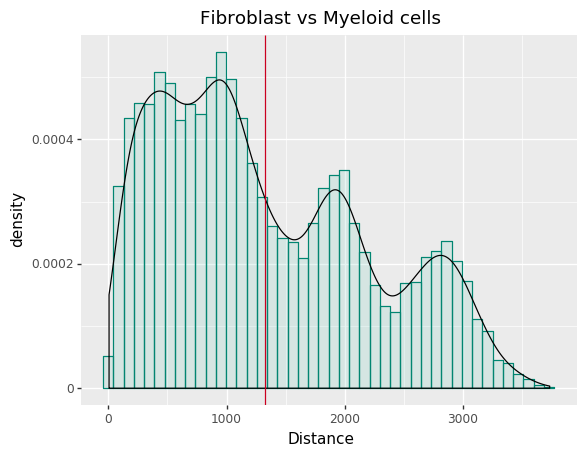

<ggplot: (360348871)>

In [57]:
f = final.loc[final['Sorted'] == 'FIBROBLAST_MYELOID'] 




avg_dist = f['Distance'].mean()



g = ggplot(f, aes(x='Distance')) + \
geom_histogram(aes(y='stat(density)'), color= '#018571', fill= '#80cdc1', alpha=.2) + \
geom_density() + \
geom_vline(f, aes(xintercept='avg_dist'), color = '#ca0020') + \
labs(title='Fibroblast vs Myeloid cells')
 



ggsave(filename='Distance_FibroblastvsMyeloid.png', plot = g, 
       path = '../Figures/')
g

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning:

'stat_bin()' using 'bins = 151'. Pick better value with 'binwidth'.



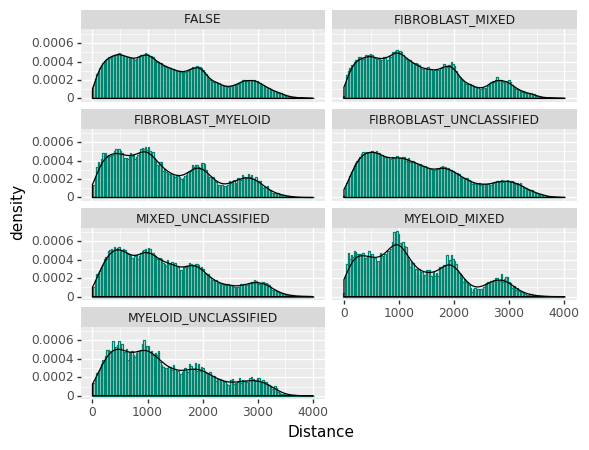

<ggplot: (362627446)>


In [75]:



# g = ggplot(final, aes(x='Distance')) + \
# geom_histogram(aes(y='stat(density)'), color= '#018571', fill= '#80cdc1', alpha=.2) + \
# geom_density() 
    
# print(g + facet_wrap('~ Sorted', nrow=4))

    
    
    
    
  

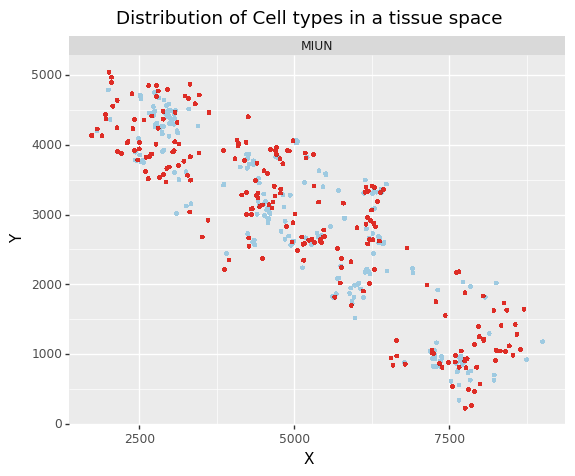

<ggplot: (350505855)>


In [58]:

p = gg.ggplot(f) + \
    gg.geom_point(gg.aes(x='X1', y='Y1'), size = 0.5, color = "#9ecae1") + \
    gg.xlab("X") + \
    gg.ylab("Y") + \
    gg.ggtitle("Distribution of Cell types in a tissue space") + \
    gg.geom_point(gg.aes(x='X2', y='Y2'), size = 0.5, color = "#de2d26")
   


    

#ggsave(filename='cell_classification.png', plot = p, 
       #path = '/Users/habbasi/Desktop/012120_Halo_outputs/Figures')



In [58]:
distlist = [15, 25, 50, 100, 250, 500, 1000, 2000]

for i, p in enumerate(distlist):
    
    f2 = f.loc[final['Distance'] <= p]
    g = gg.ggplot(f2) + \
    gg.geom_point(gg.aes(x='X1', y='Y1'), size = 0.5, color = "#9ecae1") + \
    gg.xlab("X") + \
    gg.ylab("Y") + \
    gg.labs(title= 'Distance_' +  str(p) + 'um') + \
    gg.geom_point(gg.aes(x='X2', y='Y2'), size = 0.5, color = "#de2d26") 
    ggsave(filename=str(p)+'.png', plot = g, 
       path = '../Figures/')
    
   


    







/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning:

Saving 6.4 x 4.8 in image.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning:

Filename: ../Figures/15.png

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning:

Saving 6.4 x 4.8 in image.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning:

Filename: ../Figures/25.png

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning:

Saving 6.4 x 4.8 in image.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning:

Filename: ../Figures/50.png

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/ggplot.py:727: Plotnin

In [19]:
# %reload_ext rpy2.ipython
# %R -i new

In [20]:
# from rpy2.robjects.packages import importr
# import rpy2.robjects as ro

# stats = importr('stats')
# base = importr('base')
# tidy = importr('tidyverse')
# akima = importr('akima')